# この notebook を読み進める前に
TeX 出力のためには次のコードを読み込ませること。

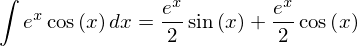

In [1]:
from sympy import *
from IPython.display import display
init_printing()

# シンボル定義
x = Symbol('x')
y = Symbol('y')

# display で出力すると mathjax 連携してくれて素敵
display(x + y + x - 4 * y)

a = Integral(cos(x)*exp(x), x)
display(Eq(a, a.doit()))

# Sympy との連携

下記コードはエラーになる.

In [2]:
from sympy import Symbol
import math
theta = Symbol('theta')
math.sin(theta) + math.sin(theta)

TypeError: can't convert expression to float

sympy 内で処理すれば計算できる.

In [2]:
from sympy import Symbol
import sympy
import math
theta = Symbol('theta')

display(sympy.sin(math.pi/2))
display(sympy.sin(theta) + sympy.sin(theta))

物体の投射の式も解けてすごい.

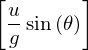

In [3]:
from sympy import sin, solve, Symbol
u = Symbol('u')
t = Symbol('t')
g = Symbol('g')
theta = Symbol('theta')
display(solve(u*sin(theta)-g*t, t))

## Sympy で条件指定

こんなこともできてすごい.

In [11]:
x = Symbol('x', positive=True)

if x > 0:
    print('Do Something')
else:
    print('Do Something else')
    
if (x + 5) > 0:
    print('Do Something')
else:
    print('Do Something else')

Do Something
Do Something


# 極限

まずはこれ。

\begin{align}
 \lim_{x \to \infty} \frac{1}{x} = 0.
\end{align}

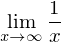

In [4]:
from sympy import Limit, Symbol, S
x = Symbol('x')

# 未評価のオブジェクト
l = Limit(1/x, x, S.Infinity)
display(l)
# Limit(1/x, x, oo, dir='-') で oo は無限大, dir='-' はマイナスから近づくことを表す.

# 評価する
display(l.doit())

display(Limit(1/x, x, 0).doit())
display(Limit(1/x, x, 0, dir='+').doit())
display(Limit(1/x, x, 0, dir='-').doit())

## 不定形
不定形も扱える。

In [5]:
from sympy import Symbol, sin
display(Limit(sin(x) / x, x, 0).doit())

# 自然対数の底

In [9]:
from sympy import Limit, Symbol, S
n = Symbol('n')
display(Limit((1 + 1 / n) ** n, n, S.Infinity).doit())

## 別の式を評価

\begin{align}
 A
 =
 P (1 + \frac{r}{n})^{nt}.
\end{align}

In [10]:
from sympy import Symbol, Limit, S
p = Symbol('p', positive  =True)
r = Symbol('r', positive = True)
t = Symbol('t', positive = True)
display(Limit(p * (1 + r / n) ** (n * t), n, S.Infinity).doit())

# 微分

## 極限を取る
次の関数を微分する.

\begin{align}
 S(t) =
 5 t^2 + 2 t + 8.
\end{align}

導関数は次の通り.
\begin{align}
 S'(t) =
 10 t + 2.
\end{align}

In [11]:
from sympy import Symbol, Limit
t = Symbol('t')
St = 5 * t ** 2 + 2 * t + 8
t1 = Symbol('t1')
delta_t = Symbol('delta_t')
St1 = St.subs({t: t1})
St1_delta = St.subs({t: t1 + delta_t})

display(Limit((St1_delta - St1) / delta_t, delta_t, 0).doit())

## 微分するメソッド

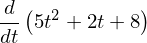

In [12]:
from sympy import Symbol, Derivative
t = Symbol('t')
St = 5*t**2 + 2*t + 8
display(Derivative(St, t))

d = Derivative(St, t)
display(d.doit())

# 導関数に代入もできる
display(d.doit().subs({t:t1}))
display(d.doit().subs({t:1}))

## 導関数を求めるプログラム

微分に使う変数: x
関数を入力: べきは ^ ではなく ** で入力すること: e ** x + log(x)


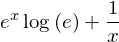

In [14]:
from sympy import Symbol, Derivative, sympify, pprint
from sympy.core.sympify import SympifyError

def derivative(f, var):
    var = Symbol(var)
    d = Derivative(f, var).doit()
    display(d)

if __name__=='__main__':
    var = input('微分に使う変数: ')
    f = input('関数を入力: べきは ^ ではなく ** で入力すること: ')
    try:
        f = sympify(f)
    except SympifyError:
        display('Invalid input')
    else:
        derivative(f, var)

# 高階の導関数や極大極小
調べるのは次の関数.
\begin{align}
 f(x) =
 x^5 - 30 x^3 + 50 x.
\end{align}

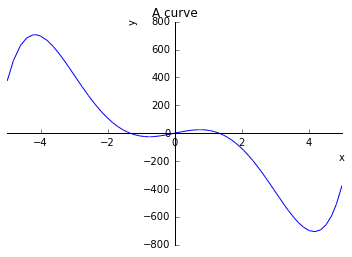

In [16]:
## 定義域の制限
%matplotlib inline
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(x ** 5 - 30 * x ** 3 + 50 * x, (x, -5, 5), title='A curve', xlabel='x', ylabel='y')

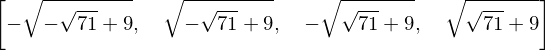


極値の評価
127.661060789073
-127.661060789073
-703.493179468151
703.493179468151

端点との比較
705.959460380365
25.0846626340294
375.000000000000
-375.000000000000


In [17]:
from sympy import Symbol, solve, Derivative, pprint
x = Symbol('x')
f = x**5 - 30*x**3 + 50*x
d1 = Derivative(f, x).doit()

display(d1)

critical_points = solve(d1)
display(critical_points)

A = critical_points[2]
B = critical_points[0]
C = critical_points[1]
D = critical_points[3]

d2 = Derivative(f, x, 2).doit()
display(d2)

print("\n極値の評価")
print(d2.subs({x:B}).evalf())
print(d2.subs({x:C}).evalf())
print(d2.subs({x:A}).evalf())
print(d2.subs({x:D}).evalf())

print("\n端点との比較")
x_min = -5
x_max = 5
print(f.subs({x:A}).evalf())
print(f.subs({x:C}).evalf())
print(f.subs({x:x_min}).evalf())
print(f.subs({x:x_max}).evalf())

# 最急降下法 (gradient ascent method)


In [18]:
import math
from sympy import Derivative, Symbol, sin
def grad_ascent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size * f1x.subs({x: x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size * f1x.subs({x: x_old}).evalf()
    return x_new

def find_max_theta(R, theta):
    # Calculate the first derivative
    R1theta = Derivative(R, theta).doit()
    theta0 = 1e-3
    theta_max = grad_ascent(theta0, R1theta, theta)
    return theta_max

if __name__ == '__main__':
    # 重力加速度
    g = 9.8

    # 初期速度
    u = 25

    # 範囲に関する式
    theta = Symbol('theta')
    R = u ** 2 * sin(2 * theta) / g

    theta_max = find_max_theta(R, theta)
    display('Theta: {0}'.format(math.degrees(theta_max)))
    display('Maximum Range: {0}'.format(R.subs({theta:theta_max})))

'Theta: 44.997815081691805'

'Maximum Range: 63.7755100185965'

## 一般的な最急降下法

In [37]:
from sympy import Derivative, Symbol, sympify
def grad_ascent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    return x_new
if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_max = grad_ascent(var0, d, var)
        print('{0}: {1}'.format(var.name, var_max))
        print('Maximum value: {0}'.format(f.subs({var:var_max})))

Enter a function in one variable: cos(y)
Enter the variable to differentiate with respect to: y
Enter the initial value of the variable: 1
y: 0.00999904956272288
Maximum value: 0.999950009920428


# 積分

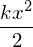

In [20]:
from sympy import Integral, Symbol
x = Symbol('x')
k = Symbol('k')

## 不定積分
i = Integral(k*x, x)
display(i.doit())

# 定積分
d = Integral(k*x, (x, 0, 2))
display(d.doit())

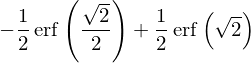

In [21]:
"""実行に少し時間がかかる"""
from sympy import Integral, Symbol
x = Symbol('x')
display(Integral(x, (x, 2, 4)).doit())

from sympy import Symbol, exp, sqrt, pi, Integral
x = Symbol('x')
p = exp(-(x - 10)**2/2)/sqrt(2*pi)
# 積分計算: 誤差関数を得る
display(Integral(p, (x, 11, 12)).doit())
# 関数の値を具体的に評価
display(Integral(p, (x, 11, 12)).doit().evalf())

from sympy import Symbol, exp, sqrt, pi, Integral, S
x = Symbol('x')
p = exp(-(x - 10) ** 2 / 2) / sqrt(2 * pi)
display(Integral(p, (x, S.NegativeInfinity, S.Infinity)).doit().evalf())